In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.preprocessing import  LabelEncoder, StandardScaler
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
# from sklearn import metrics
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
# from sklearn.ensemble import RandomForestRegressor

<Axes: >

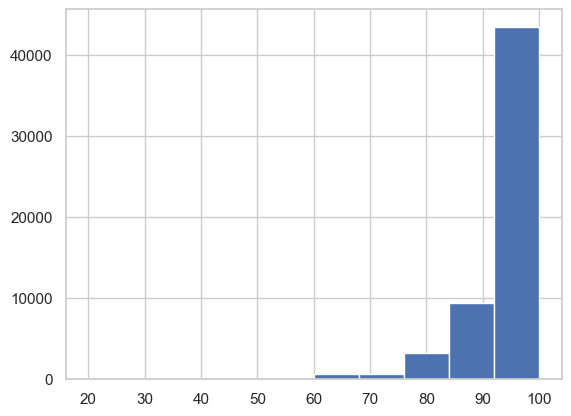

In [218]:
df = pd.read_csv("train.csv")

In [152]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [153]:
df.shape

(74111, 29)

In [154]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [155]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [157]:
df.drop(['id','description','thumbnail_url','name'],axis=1,inplace=True)
index = df.columns
for i in index:
    print(df[i].value_counts())

log_price
5.010635    2729
4.605170    2707
4.317488    2049
5.298317    1923
3.912023    1920
            ... 
6.999422       1
6.725034       1
7.070724       1
6.156979       1
6.357842       1
Name: count, Length: 767, dtype: int64
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                

In [158]:
df.dropna(subset=['neighbourhood'],inplace=True)

In [159]:
print(df.columns.size)
for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))

25

bathrooms :- 193,  dtypes : float64

first_review :- 14096,  dtypes : object

host_has_profile_pic :- 185,  dtypes : object

host_identity_verified :- 185,  dtypes : object

host_response_rate :- 17335,  dtypes : object

host_since :- 185,  dtypes : object

last_review :- 14060,  dtypes : object

review_scores_rating :- 14896,  dtypes : float64

zipcode :- 579,  dtypes : object

bedrooms :- 81,  dtypes : float64

beds :- 113,  dtypes : float64


In [160]:
placeToZip = {
    "Park Slope": 11215,
    "Financial District": 10004,
    "Bushwick": 11237,
    "Gramercy Park": 10010,
    "Brighton Beach": 11235,
    "Civic Center": 10007,
    "Flatbush": 11226,
    "Sunset Park": 11220,
    "Crown Heights": 11213,
    "Williamsburg": 11211,
    "Western Addition/NOPA": 94115,
    "Ridgewood": 11385,
    "Concourse": 10453,
    "Roxbury": 2118,
    "Lower East Side": 10002,
    "Soho": 10012,
    "Mission District": 94110,
    "Upper East Side": 10021,
    "Marina Del Rey": 90292,
    "Ditmars / Steinway": 11105,
    "Bedford-Stuyvesant": 11205,
    "Encino": 91316,
    "Chelsea": 10001,
    "Richmond District": 94121,
    "Wicker Park": 60622,
    "Downtown": 60622,
    "SoMa": 94103,
    "South End": 2118,
    "Back Bay": 2116,
    "Harlem": 10026,
    "Tenderloin": 94102,
    "Mission Bay": 94158,
    "Nolita": 10012,
    "Alphabet City": 10009,
    "Bayview": 94124,
    "Long Island City": 11101,
    "East Harlem": 10029,
    "East Boston": 2128,
    "Lefferts Garden": 11225,
    "Coney Island": 11224,
    "Russian Hill": 94133,
    "Columbia Street Waterfront": 11231,
    "Washington Heights": 10032,
    "Upper West Side": 10023,
    "Carroll Gardens": 11231,
    "Inwood": 10034,
    "Murray Hill": 10016,
    "Sunnyside": 11104,
    "Hell's Kitchen": 10019,
    "Venice": 90291,
    "South Beach": 94105,
    "Times Square/Theatre District": 10036,
    "Astoria": 11103,
    "Nob Hill": 94108,
    "Meatpacking District": 10014,
    "Midtown East": 10022,
    "Hamilton Heights": 10031,
    "East Hollywood": 90028,
    "Howard Beach": 11414,
    "Midtown": 10019,
    "Flatiron District": 10010,
    "Borough Park": 11219,
    "Malibu": 90265,
    "Chinatown": 10013,
    "Marina": 94123,
    "Forest Hills": 11375,
    "Kew Garden Hills": 11367,
    "Morningside Heights": 10027,
    "Allston-Brighton": 2134,
    "Woodland Hills/Warner Center": 91367,
    "Beacon Hill": 2108,
    "Telegraph Hill": 94133,
    "Greenwich Village": 10014,
    "Clinton Hill": 11205,
    "Georgetown": 11205,
    "West Village": 10014,
    "Flushing": 11354,
    "North End": 2113,
    "Rancho Palos Verdes": 90275,
    "Midwood": 11230,
    "Fort Greene": 11205,
    "East Flatbush": 11203,
    "Prospect Heights": 11238,
    "East Village": 10003,
    "Northridge": 91324,
    "Noe Valley": 94114,
    "Elmhurst": 11373,
    "Red Hook": 11231,
    "Manhattan": 11231,
    "Excelsior": 94112,
    "Union Square": 10003,
    "Twin Peaks": 94131,
    "North Beach": 94133,
    "Hollywood": 90028,
    "Outer Sunset": 94122,
    "Jamaica Plain": 2130,
    "Jamaica": 11432,
    "Cow Hollow": 94123,
    "Logan Square": 60647,
    "Arrochar": 10305,
    "Brooklyn Heights": 11201,
    "Santa Monica": 90402,
    "Dorchester": 2124,
    "Woodhaven": 11421,
    "Lower Haight": 94117,
    "Crocker Amazon": 94112,
    "Gravesend": 11223,
    "Bernal Heights": 94110,
    "Claremont": 94110,
    "Parkchester": 10462,
    "Roslindale": 2131,
    "The Rockaways": 11693,
    "Pacific Heights": 94115,
    "Greenwood Heights": 11232,
    "Haight-Ashbury": 94117,
    "Corona": 11368,
    "West Hollywood": 90046,
    "Near Northeast/H Street Corridor": 90046,
    "Tribeca": 10013,
    "Queens": 11450,
    "Greenpoint": 11222,
    "East Elmhurst": 11369,
    "Glendale": 11385,
    "Kips Bay": 10016,
    "Fenway/Kenmore": 2215,
    "Mission Hill": 2120,
    "Middle Village": 11379,
    "Richmond Hill": 11418,
    "Bath Beach": 11214,
    "Parkside": 11226,
    "Diamond Heights": 94131,
    "East New York": 11207,
    "Alamo Square": 94115,
    "Downtown Brooklyn": 11217,
    "Bel Air/Beverly Crest": 90077,
    "Mott Haven": 10455,
    "Sheepshead Bay": 11235,
    "Capitol Hill": 11235,
    "South Boston": 2127,
    "Presidio": 94129,
    "Hollywood Hills": 90068,
    "Inner Sunset": 94122
}

In [161]:
def fillZipCode():
    for i, (n , z) in enumerate(zip(df["neighbourhood"],df["zipcode"])):
        if pd.isnull(z):
            df.at[i, "zipcode"] = placeToZip[n]
            # print(n, "Zip code updated:", placeToZip[n])
fillZipCode()

In [162]:
df.zipcode.isnull().sum()
df.dropna(subset=['zipcode'], inplace=True)

In [163]:
df['zipcode'] = df['zipcode'].str.split('-').str[0]
df = df[(df['zipcode'] != '1m')]

In [164]:
# it's the target value
# when we drop this columns we also drop first_review and last_review columns
df.dropna(subset=['review_scores_rating'], inplace=True)

In [165]:
df.bathrooms.fillna(1,inplace=True)

In [166]:
# when we drop this columns we also drop first_review and last_review columns that why we didn't dropped last_review
df.dropna(subset=['first_review'], inplace=True)

In [167]:
df.host_has_profile_pic.fillna('f',inplace=True)

In [168]:
df.host_identity_verified.fillna('f',inplace=True)

In [169]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
mean_value = df['host_response_rate'].mean()
# Fill null values with the mean
df['host_response_rate'].fillna(mean_value, inplace=True)

In [170]:
df['host_response_rate'].value_counts(dropna=False)

host_response_rate
100.000000    34039
95.573815      8954
90.000000      1871
80.000000       877
70.000000       392
              ...  
15.000000         1
27.000000         1
31.000000         1
21.000000         1
66.000000         1
Name: count, Length: 78, dtype: int64

In [171]:
df.dropna(subset=['host_since'], inplace=True)
print(df["host_response_rate"].dtype)

float64


In [172]:
df.dropna(subset=['zipcode'], inplace=True)

In [173]:
df['beds'].fillna(df['accommodates'], inplace=True)

In [174]:
def custom_fillna(value1, value2):
    if np.isnan(value1):
        return divmod(value2, 2)[0] + divmod(value2, 2)[1]
    else:
        return value1

# Apply the custom function to fill null values in 'column1'
df['bedrooms'] = df.apply(lambda row: custom_fillna(row['bedrooms'], row['beds']), axis=1)

In [175]:
print(df.columns.size)
for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))

25


<Axes: >

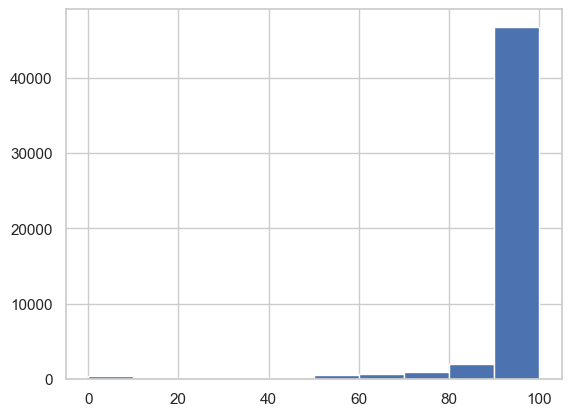

In [176]:
df["host_response_rate"].hist()

In [177]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [219]:
df['log_price'] = np.exp(df['log_price']).round(2)

In [179]:
# def satisfaction_bar(df):   
#     import matplotlib
#     import numpy as np
#     import matplotlib.pyplot as plt
#     plt.rcParams.update({'figure.max_open_warning': 0})
    
#     # names = df.columns.tolist()
#     selected_names= ['property_type','room_type','bed_type','cancellation_policy','cleaning_fee','city',
#                     'first_review','host_has_profile_pic','host_identity_verified','host_response_rate',
#                     'host_since','instant_bookable','last_review','zipcode']
#     for col in selected_names:
#         if(df[col].dtype not in [np.int64, np.int32, np.float64]):
#             temp1 = df.loc[df.review_scores_rating == 1, col].value_counts()
#             temp0 = df.loc[df.review_scores_rating == 0, col].value_counts() 
#             fig = plt.figure(figsize=(8,4))
#             fig.clf()
#             ax1 = fig.add_subplot(1, 2, 1)
#             ax0 = fig.add_subplot(1, 2, 2) 
#             temp1.plot(kind = 'bar', ax = ax1)
#             ax1.set_title('Values of ' + col + '\n for satisfied clients')
#             temp0.plot(kind = 'bar', ax = ax0)
#             ax0.set_title('Values of ' + col + '\n for not satisfied clients')
#             fig.savefig('bar_' + col + '.png')
#             print(col)
    
            
#     return 'Done'
# satisfaction_bar(df)

In [180]:
# temp1 = df.loc[df.review_scores_rating == 1, 'room_type'].value_counts()
# temp0 = df.loc[df.review_scores_rating == 0, 'room_type'].value_counts() 

# fig = plt.figure(figsize=(8,4))
# fig.clf()
# ax1 = fig.add_subplot(1, 2, 1)
# ax0 = fig.add_subplot(1, 2, 2) 
# temp1.plot(kind = 'bar', ax = ax1)
# ax1.set_title('Values of ' + col + '\n for satisfied clients')
# temp0.plot(kind = 'bar', ax = ax0)
# ax0.set_title('Values of ' + col + '\n for not satisfied clients')

In [181]:
# df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
# df.zipcode = df.zipcode.astype(float)
# for e in df.zipcode:
#     if not isinstance(e, float):
#         print(e)

In [182]:
# df.zipcode = df.zipcode.astype(float)
def codage_categorie(data):
    from sklearn import preprocessing

    le = preprocessing.LabelEncoder()
    for column_name in data.columns:
        if data[column_name].dtype == object:
            data[column_name] = le.fit_transform(data[column_name])
        else:
            pass
    return data

df = codage_categorie(df)

In [183]:

# def satisfaction_box(df):
#     import matplotlib
#     import numpy as np
#     import matplotlib.pyplot as plt
#     plt.rcParams.update({'figure.max_open_warning': 0})
    
#     names = df.columns.tolist()
#     for col in names:
#         if(df[col].dtype in [np.int64, np.int32, np.float64]):
#             temp1 = df.loc[df.review_scores_rating == 1, col]
#             temp0 = df.loc[df.review_scores_rating == 0, col]  
             
#             fig = plt.figure(figsize=(8,4))
#             fig.clf()
#             ax1 = fig.add_subplot(1, 2, 1)
#             ax0 = fig.add_subplot(1, 2, 2) 
#             ax1.boxplot(temp1.to_numpy())
#             ax1.set_title('Box plot of ' + col + '\n for satisfied clients')
#             ax0.boxplot(temp0.to_numpy())
#             ax0.set_title('Box plot of ' + col + '\n for not satisfied clients')
#             fig.savefig('box_' + col + '.png')

#     return 'Done'
    
# satisfaction_box(df)

In [184]:
# def satisfaction_hist(df):
#     import matplotlib
#     import numpy as np
#     import matplotlib.pyplot as plt
#     plt.rcParams.update({'figure.max_open_warning': 0})
    
#     names = df.columns.tolist()
#     for col in names:
#         if(df[col].dtype in [np.int64, np.int32, np.float64]):
#             temp1 = df.loc[df.review_scores_rating == 1, col]
#             temp0 = df.loc[df.review_scores_rating == 0, col]  
             
#             fig = plt.figure(figsize=(8,4))
#             fig.clf()
#             ax1 = fig.add_subplot(1, 2, 1)
#             ax0 = fig.add_subplot(1, 2, 2) 
#             ax1.hist(temp1.to_numpy(), bins = 30)
#             ax1.set_title('Histogram of ' + col + '\n for readmitted patients')
#             ax0.hist(temp0.to_numpy(), bins = 30)
#             ax0.set_title('Histogram of ' + col + '\n for patients not readmitted')
#             fig.savefig('hist_' + col + '.png')

#     return 'Done'

# satisfaction_hist(df)

## training the model (without feature selection)Feature selection

In [185]:
from sklearn.model_selection import train_test_split

In [220]:
y = df['log_price']
x = df.drop('log_price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

print('Train set:', x_train.shape)
print('Test set:', x_test.shape)

Train set: (44466, 28)
Test set: (29645, 28)


In [221]:
from sklearn.linear_model import LogisticRegression

In [222]:
# for i in df.columns:
#     print(df[i].value_counts())
columns_with_nan = df.columns[df.isna().any()].tolist()

# Print the columns with NaN values
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['bathrooms', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'last_review', 'neighbourhood', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds']


In [189]:
model = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='ovr')

model.fit(x_train, y_train)

print('test score:', model.score(x_test, y_test))

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred =  model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[  139,  6875],
       [  153, 13394]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.02      0.04      7014
           1       0.66      0.99      0.79     13547

    accuracy                           0.66     20561
   macro avg       0.57      0.50      0.42     20561
weighted avg       0.60      0.66      0.53     20561



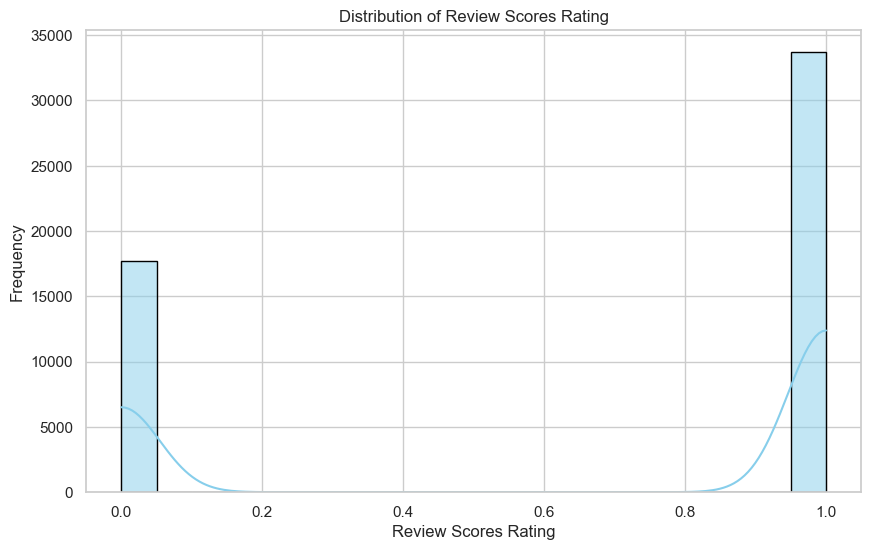

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(df)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a histogram for 'review_scores_rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['review_scores_rating'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.show()


## Feature Selection

<h2>Variance threshold</h2>

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
selector = VarianceThreshold(threshold=0.4)
selector.fit(x)

VarianceThreshold(threshold=0.4)

In [ ]:
x_selected_columns = x.columns[selector.get_support()]
print(x_selected_columns.size)

17


In [ ]:
x_selected = x[x_selected_columns]
print(x_selected)

       log_price  property_type  amenities  accommodates  cancellation_policy  \
0       5.010635              0       4070           3.0                    2   
1       5.129899              0       4176           7.0                    2   
2       4.976734              0      14872           5.0                    1   
4       4.744932              0      39247           2.0                    1   
5       4.442651              0      35605           2.0                    2   
...          ...            ...        ...           ...                  ...   
74102   4.110874             29      31068          10.0                    0   
74103   5.135798              0      16718           2.0                    1   
74107   5.043425              0      28380           4.0                    1   
74108   5.220356              0      43416           5.0                    1   
74110   4.852030              2      45970           4.0                    1   

       city  first_review  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x_selected, y, test_size=0.4, random_state=5)

print('Train set:', x2_train.shape)
print('Test set:', x2_test.shape)

Train set: (30840, 17)
Test set: (20561, 17)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model2 = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='ovr')

model2.fit(x2_train, y2_train)

print('test score:', model2.score(x2_test, y2_test))

test score: 0.6580905597976752


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
y2_pred =  model2.predict(x2_test)
confusion_matrix(y2_test, y2_pred)

array([[  268,  6746],
       [  284, 13263]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report  
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.49      0.04      0.07      7014
           1       0.66      0.98      0.79     13547

    accuracy                           0.66     20561
   macro avg       0.57      0.51      0.43     20561
weighted avg       0.60      0.66      0.55     20561



## Select from Model

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import RFECV

In [ ]:
selector2 = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector2.fit(x, y)

SelectFromModel(estimator=SGDClassifier(random_state=0), threshold='mean')

In [ ]:
x_selected_columns2 = x_train.columns[selector2.get_support()]
print(x_selected_columns2.size)

7


In [ ]:
x_selected2 = x[x_selected_columns2]
print(x_selected2)

       property_type  accommodates  cancellation_policy  host_response_rate  \
0                  0           3.0                    2           95.573815   
1                  0           7.0                    2          100.000000   
2                  0           5.0                    1          100.000000   
4                  0           2.0                    1          100.000000   
5                  0           2.0                    2          100.000000   
...              ...           ...                  ...                 ...   
74102             29          10.0                    0          100.000000   
74103              0           2.0                    1          100.000000   
74107              0           4.0                    1          100.000000   
74108              0           5.0                    1          100.000000   
74110              2           4.0                    1          100.000000   

        latitude   longitude  beds  
0      40.6965

In [ ]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x_selected2, y, test_size=0.4, random_state=5)

print('Train set:', x3_train.shape)
print('Test set:', x3_test.shape)

Train set: (30840, 7)
Test set: (20561, 7)


In [ ]:
model3 = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='ovr')

model3.fit(x3_train, y3_train)

print('test score:', model3.score(x3_test, y3_test))

test score: 0.6589173678323039


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y3_pred =  model3.predict(x3_test)
confusion_matrix(y3_test, y3_pred)

array([[  126,  6888],
       [  125, 13422]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report  
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.50      0.02      0.03      7014
           1       0.66      0.99      0.79     13547

    accuracy                           0.66     20561
   macro avg       0.58      0.50      0.41     20561
weighted avg       0.61      0.66      0.53     20561



## select K_best

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [ ]:
x2 = df.drop(['review_scores_rating','longitude'], axis=1)

In [ ]:
selector3 = SelectKBest(chi2, k=13)
# print(selector3.get_support())
selector3.fit(x2, y)

SelectKBest(k=13, score_func=<function chi2 at 0x00000212A9C96660>)

In [ ]:
selected_columns3 = x2.columns[selector3.get_support()]
x_selected3 = x[selected_columns3]

In [ ]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x_selected3, y, test_size=0.4, random_state=5)

print('Train set:', x4_train.shape)
print('Test set:', x4_test.shape)

Train set: (30840, 13)
Test set: (20561, 13)


In [ ]:
model4 = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='ovr')

model4.fit(x4_train, y4_train)

print('test score:', model4.score(x4_test, y4_test))

test score: 0.6590146393657896


In [ ]:
y4_pred =  model4.predict(x4_test)
confusion_matrix(y4_test, y4_pred)

array([[   15,  6999],
       [   12, 13535]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report  
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

           0       0.56      0.00      0.00      7014
           1       0.66      1.00      0.79     13547

    accuracy                           0.66     20561
   macro avg       0.61      0.50      0.40     20561
weighted avg       0.62      0.66      0.52     20561



## Learning curve

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
from sklearn import linear_model
red = linear_model.Ridge(alpha=.5)

model5 = LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000, multi_class='ovr')
red.fit(x_train_scaled, y_train)

Ridge(alpha=0.5)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

[ 2467  3635  4804  5973  7141  8310  9479 10647 11816 12985 14153 15322
 16491 17659 18828 19997 21165 22334 23503 24672]


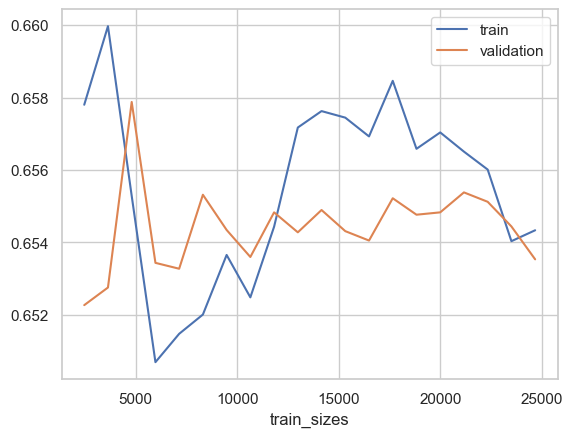

In [ ]:
N, train_score, val_score = learning_curve(model5, x_train, y_train,
                                           train_sizes=np.linspace(0.1, 1.0, 20), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [ ]:
print(df.review_scores_rating)

0        1
1        0
2        0
4        0
5        1
        ..
74102    0
74103    1
74107    0
74108    1
74110    1
Name: review_scores_rating, Length: 51401, dtype: int64
